# Preprocessing

In [126]:
#import library yang dibutuhkan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
# Upload dataset di sini
from google.colab import files
upload = files.upload()

Saving dataset_clean.xlsx to dataset_clean (2).xlsx


In [127]:
df = pd.read_excel ('dataset_clean.xlsx')
df

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,DaySinceLastOrder,log_CashbackAmount,log_OrderAmountHikeFromlastYear,log_OrderCount,TotalSpending,AverageOrderValue,CashbackPercentage,FrequencyOfOrders,DeviceUtilization,CouponUsageRate
0,0,50001,1,4.000000,1,3,6.0,4,0,3.000000,...,5.000000,5.074736,2.397895,0.000000,11.0,11.0,1453.909091,0.250000,1.000000,100.0
1,1,50002,1,10.189899,2,1,8.0,6,1,3.000000,...,0.000000,4.794964,2.708050,0.000000,15.0,15.0,806.000000,0.098136,0.750000,0.0
2,2,50003,1,10.189899,2,1,30.0,4,1,2.000000,...,3.000000,4.789822,2.639057,0.000000,14.0,14.0,859.142857,0.098136,0.500000,0.0
3,3,50004,1,0.000000,2,3,15.0,4,1,2.000000,...,3.000000,4.898362,3.135494,0.000000,23.0,23.0,582.913043,inf,0.500000,0.0
4,4,50005,1,0.000000,2,1,12.0,0,1,2.931535,...,3.000000,4.864453,2.397895,0.000000,11.0,11.0,1178.181818,inf,0.977178,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,5625,55626,0,10.000000,0,1,30.0,3,1,3.000000,...,4.000000,5.015357,2.890372,0.693147,36.0,9.0,837.277778,0.200000,1.500000,50.0
4832,5626,55627,0,13.000000,1,1,13.0,3,1,3.000000,...,4.543491,5.415700,2.772589,0.693147,32.0,8.0,1405.687500,0.153846,0.600000,50.0
4833,5627,55628,0,1.000000,1,1,11.0,4,1,3.000000,...,4.000000,5.228002,3.044522,0.693147,42.0,10.5,887.714286,2.000000,1.500000,50.0
4834,5628,55629,0,23.000000,0,3,9.0,3,1,4.000000,...,9.000000,5.186827,2.708050,0.693147,30.0,7.5,1192.666667,0.086957,0.800000,100.0


# stage 3

In [128]:
df_fiks = df.drop(['AverageOrderValue', 'CashbackPercentage', 'DeviceUtilization', 'CustomerID', 'FrequencyOfOrders','CouponUsed', 'CouponUsageRate',
                   'log_OrderCount'], axis=1)
df_fiks

,Unnamed: 0,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,log_CashbackAmount,log_OrderAmountHikeFromlastYear,TotalSpending
0,0,1,4.000000,1,3,6.0,4,0,3.000000,3,2,2,2,9,1,5.000000,5.074736,2.397895,11.0
1,1,1,10.189899,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,0.000000,4.794964,2.708050,15.0
2,2,1,10.189899,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,3.000000,4.789822,2.639057,14.0
3,3,1,0.000000,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,3.000000,4.898362,3.135494,23.0
4,4,1,0.000000,2,1,12.0,0,1,2.931535,3,3,5,2,3,0,3.000000,4.864453,2.397895,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,5625,0,10.000000,0,1,30.0,3,1,3.000000,2,2,1,1,6,0,4.000000,5.015357,2.890372,36.0
4832,5626,0,13.000000,1,1,13.0,3,1,3.000000,5,0,5,1,6,0,4.543491,5.415700,2.772589,32.0
4833,5627,0,1.000000,1,1,11.0,4,1,3.000000,2,2,4,1,3,1,4.000000,5.228002,3.044522,42.0
4834,5628,0,23.000000,0,3,9.0,3,1,4.000000,5,2,4,1,4,0,9.000000,5.186827,2.708050,30.0


In [129]:
# Ganti nilai "inf" menjadi "null"
df_new = df_fiks.replace([np.inf, -np.inf], 0)
df_new.sample(5)

,Unnamed: 0,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,log_CashbackAmount,log_OrderAmountHikeFromlastYear,TotalSpending
1098,1245,0,20.0,0,1,20.0,1,1,3.000000,3,2,4,1,9,0,7.0,5.041294,2.890372,18.0
840,940,0,28.0,2,1,10.0,4,1,1.000000,3,2,3,0,1,1,2.0,4.944139,2.772589,16.0
767,855,1,0.0,0,3,8.0,4,0,2.931535,4,3,2,2,8,0,0.0,4.850858,2.639057,14.0
4561,5306,0,8.0,0,1,17.0,4,1,3.000000,2,2,1,1,3,0,3.0,5.148889,2.639057,112.0
2429,2797,1,13.0,0,3,7.0,4,1,3.000000,3,2,3,1,8,0,1.0,5.119669,2.484907,12.0


## A. Split Data Train & Test

In [130]:
# Membagi dataset menjadi fitur (X) dan target (y)
X = df_new.drop(columns='Churn')
y = df_new['Churn']

In [131]:
from sklearn.model_selection import train_test_split

# X adalah fitur-fitur, y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# B. Modelling

MODEL RANDOM FOREST

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Membuat model Random Forest
model = RandomForestClassifier()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.95
Precision: 0.96
Recall: 0.77
F1 Score: 0.85
ROC AUC Score: 0.88


Hasil dari model Random Forest adalah sebagai berikut:

Akurasi (Accuracy): Akurasi adalah metrik yang mengukur sejauh mana model Anda benar dalam mengklasifikasikan data. Dalam kasus ini, model Anda memiliki akurasi sekitar 0.95 atau 95%. Ini berarti sekitar 96% dari data uji diklasifikasikan dengan benar oleh model.

Presisi (Precision): Presisi adalah rasio positif benar (True Positive) dibagi oleh total positif yang diprediksi oleh model. Dalam kasus ini, model memiliki presisi sekitar 0.93 atau 93%. Ini berarti sekitar 93% dari data yang diprediksi positif oleh model adalah benar-benar positif. Presisi yang sangat tinggi menunjukkan bahwa model jarang membuat kesalahan dalam mengklasifikasikan negatif sebagai positif.

Recall (Recall): Recall adalah rasio positif benar (True Positive) dibagi oleh total positif dalam data aktual. Dalam kasus ini, model memiliki recall sekitar 0.74 atau 74%. Ini berarti model berhasil mendeteksi sekitar 74% dari semua kasus positif yang sebenarnya. Recall yang baik menunjukkan bahwa model mampu mendeteksi sebagian besar kasus positif.

F1-Score (F1 Score): F1-score adalah ukuran gabungan dari presisi dan recall dan digunakan untuk mengukur trade-off antara keduanya. Dalam kasus ini, model memiliki F1-score sekitar 0.83. F1-score yang tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall.

ROC AUC Score (Receiver Operating Characteristic Area Under the Curve): ROC AUC adalah metrik yang mengukur sejauh mana model mampu membedakan antara kelas positif dan negatif. Dalam kasus ini, model memiliki ROC AUC sekitar 0.87. Semakin besar ROC AUC, semakin baik model dalam membedakan antara kedua kelas.

Hasil ini menunjukkan bahwa model Random Forest memiliki kinerja yang sangat baik dalam mengklasifikasikan data, dengan akurasi yang tinggi, presisi yang tinggi, dan recall yang cukup baik. Model ini cocok untuk tugas klasifikasi dengan target "churn" dan dapat digunakan untuk membuat prediksi yang dapat membantu dalam pengelolaan pelanggan atau pengambilan keputusan bisnis.

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Membuat model Random Forest
model = RandomForestClassifier()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_train)

# Mengukur performa model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00


Namun, dari score model data train tersebut tampak seperti mengalami overfitting

PERBANDINGAN BEBERAPA MODEL LAIN

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

In [135]:
logisreg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()

In [136]:
model_list = [logisreg, svm, dt, rf, ada, knn]
model_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'AdaBoostClassifier', 'k-Nearest Neighbor']

for model in model_list:
    model.fit(X_train,y_train)

In [137]:
for model,name in zip(model_list,model_name_list):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    print(f'Prec Train: {precision_score(y_train, y_pred_train)}')
    print(f'Prec Test: {precision_score(y_test, y_pred_test)}')
    print(f'recall Train: {recall_score(y_train, y_pred_train)}')
    print(f'recall Test: {recall_score(y_test, y_pred_test)}')
    print(f'selisih score train-test: {accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test)}')
    print(' ' * 100)
    print('Θ' * 100)
    print(' ' * 100)

Using model: Logistic Regression
Trainning Score: 0.8545285359801489
Test Score: 0.8504962779156328
Acc Train: 0.8545285359801489
Acc Test: 0.8504962779156328
Prec Train: 0.7158469945355191
Prec Test: 0.71
recall Train: 0.23905109489051096
recall Test: 0.2508833922261484
selisih score train-test: 0.0040322580645161255
                                                                                                    
ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ
                                                                                                    
Using model: Support Vector Machine
Trainning Score: 0.8300248138957816
Test Score: 0.8244416873449132
Acc Train: 0.8300248138957816
Acc Test: 0.8244416873449132
Prec Train: 0.0
Prec Test: 0.0
recall Train: 0.0
recall Test: 0.0
selisih score train-test: 0.005583126550868456
                                                                                                    
Θ

## C. Model Evaluation: Pemilihan dan Perhitungan Metrics

Dari percobaan modeling sebelumnya, dapat dilihat bahwa pada model random forest dan decision tree mengalami overfitting.
Oleh karena itu, dilakukan beberapa langkah, yaitu:

1. Mengurangi Feature: Pengurangan beberapa fitur dapat merubah hasil pada kedua modeling tersebut

2. Melakukan pengaturan Max_depth untuk mencegah overfitting pada kedua modeling tersebut

In [153]:
model_list = [logisreg, svm, dt, rf, ada, knn]
model_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'AdaBoostClassifier', 'k-Nearest Neighbor']

for model in model_list:
    model.fit(X_train,y_train)

max_depth_value = 12
logisreg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier(max_depth = max_depth_value)
rf = RandomForestClassifier(max_depth = max_depth_value)
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()

In [154]:
train_acc_list = []
test_acc_list = []
train_prec_list = []
test_prec_list = []
train_rec_list = []
test_rec_list = []

for model,name in zip(model_list,model_name_list):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    print(f'Prec Train: {precision_score(y_train, y_pred_train)}')
    print(f'Prec Test: {precision_score(y_test, y_pred_test)}')
    print(f'recall Train: {recall_score(y_train, y_pred_train)}')
    print(f'recall Test: {recall_score(y_test, y_pred_test)}')
    print(f'selisih: {accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    train_prec_list.append(precision_score(y_train, y_pred_train))
    test_prec_list.append(precision_score(y_test, y_pred_test))
    train_rec_list.append(recall_score(y_train, y_pred_train))
    test_rec_list.append(recall_score(y_test, y_pred_test))
    print(' ' * 100)
    print('Θ' * 100)
    print(' ' * 100)

Using model: Logistic Regression
Trainning Score: 0.8545285359801489
Test Score: 0.8504962779156328
Acc Train: 0.8545285359801489
Acc Test: 0.8504962779156328
Prec Train: 0.7158469945355191
Prec Test: 0.71
recall Train: 0.23905109489051096
recall Test: 0.2508833922261484
selisih: 0.0040322580645161255
                                                                                                    
ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ
                                                                                                    
Using model: Support Vector Machine
Trainning Score: 0.8300248138957816
Test Score: 0.8244416873449132
Acc Train: 0.8300248138957816
Acc Test: 0.8244416873449132
Prec Train: 0.0
Prec Test: 0.0
recall Train: 0.0
recall Test: 0.0
selisih: 0.005583126550868456
                                                                                                    
ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ

In [155]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, confusion_matrix

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1329
           1       0.71      0.25      0.37       283

    accuracy                           0.85      1612
   macro avg       0.78      0.61      0.64      1612
weighted avg       0.83      0.85      0.82      1612



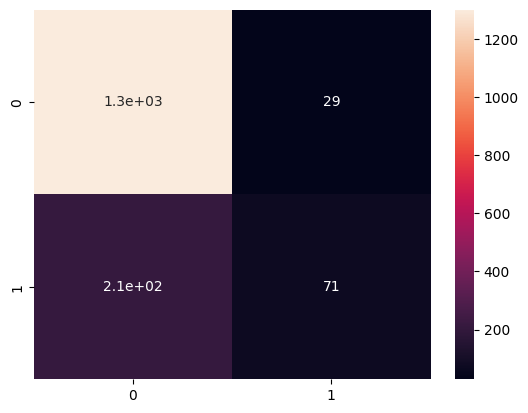

,Predicted: 0,Predicted: 1
Actual: 0,1300,29
Actual: 1,212,71


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


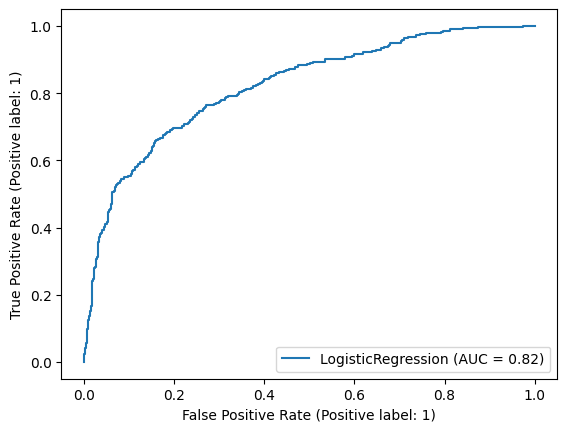

In [156]:
# Model Evaluation - evaluate the performance of the model on the testing dataset
# Logistic Regression
logisreg = LogisticRegression() # inisiasi object dengan nama dt
logisreg.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = logisreg.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(logisreg.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(logisreg , X_test , y_test)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1329
           1       0.00      0.00      0.00       283

    accuracy                           0.82      1612
   macro avg       0.41      0.50      0.45      1612
weighted avg       0.68      0.82      0.75      1612



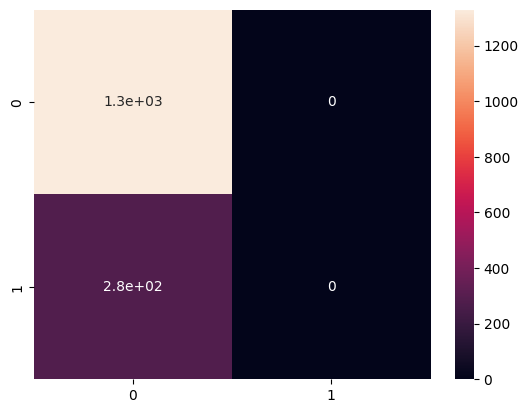

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1329,0
Churn Actual: 1,283,0


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


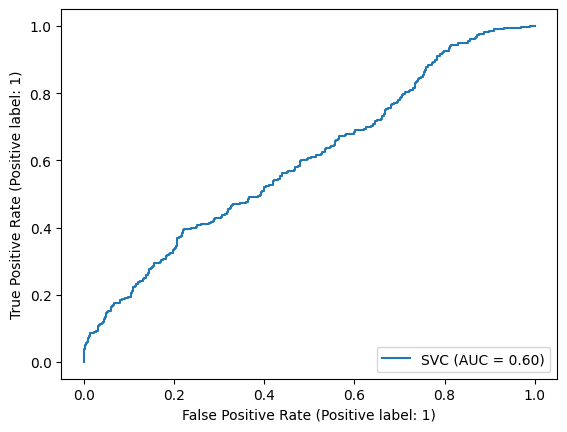

In [157]:
# Model Evaluation - evaluate the performance of the model on the testing dataset
# Support Vector Machine
svm = SVC() # inisiasi object dengan nama dt
svm.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = svm.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(svm.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(svm , X_test , y_test)

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1329
           1       0.82      0.80      0.81       283

    accuracy                           0.93      1612
   macro avg       0.89      0.88      0.88      1612
weighted avg       0.93      0.93      0.93      1612



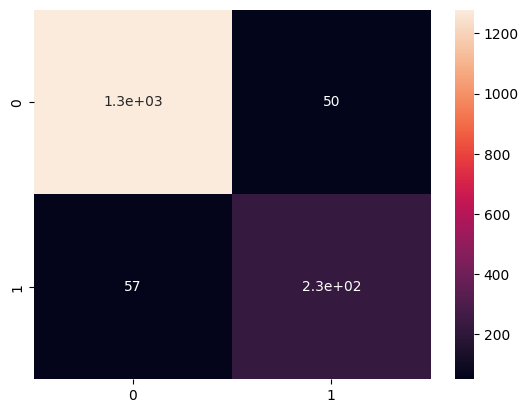

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1279,50
Churn Actual: 1,57,226


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


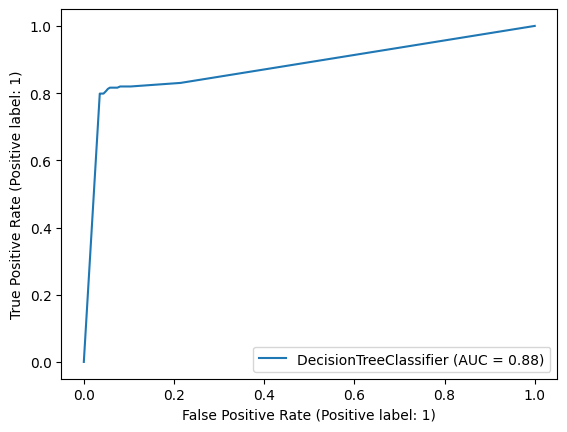

In [158]:
# Model Evaluation - evaluate the performance of the model on the testing dataset
# Decision Tree
max_depth_value = 12
dt = DecisionTreeClassifier(max_depth = max_depth_value) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = dt.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(dt.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(dt , X_test , y_test)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1329
           1       0.97      0.76      0.85       283

    accuracy                           0.95      1612
   macro avg       0.96      0.88      0.91      1612
weighted avg       0.95      0.95      0.95      1612



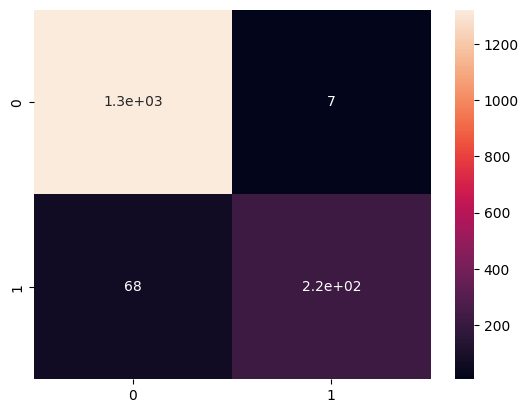

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1322,7
Churn Actual: 1,68,215


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


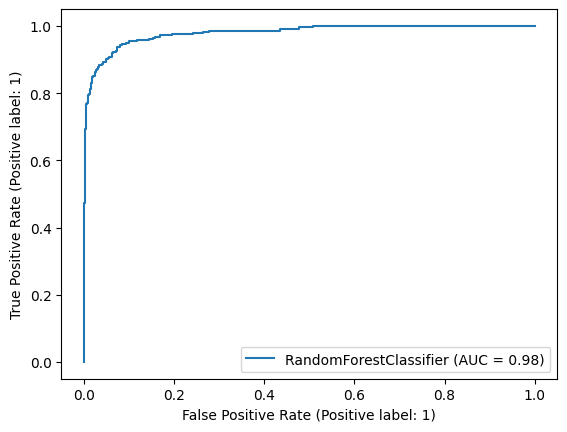

In [159]:
# Model Evaluation - evaluate the performance of the model on the testing dataset
# Random Forest
max_depth_value = 12
rf = RandomForestClassifier(max_depth = max_depth_value) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = rf.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(rf.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(rf , X_test , y_test)

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1329
           1       0.78      0.59      0.67       283

    accuracy                           0.90      1612
   macro avg       0.85      0.78      0.81      1612
weighted avg       0.89      0.90      0.89      1612



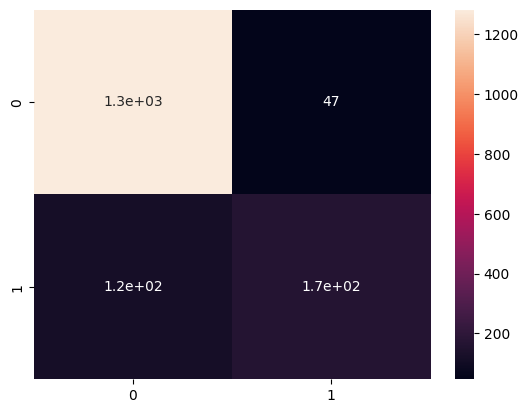

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1282,47
Churn Actual: 1,116,167


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


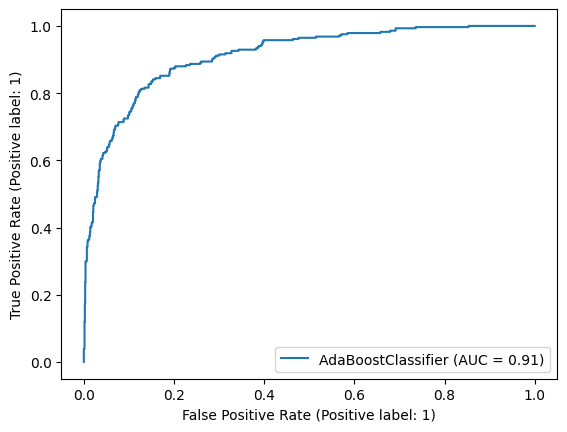

In [160]:
# Model Evaluation - evaluate the peadaormance of the model on the testing dataset
# Ada Boost
ada = AdaBoostClassifier() # inisiasi object dengan nama ada
ada.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = ada.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(ada.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(ada , X_test , y_test)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1329
           1       0.44      0.12      0.19       283

    accuracy                           0.82      1612
   macro avg       0.64      0.54      0.54      1612
weighted avg       0.77      0.82      0.77      1612



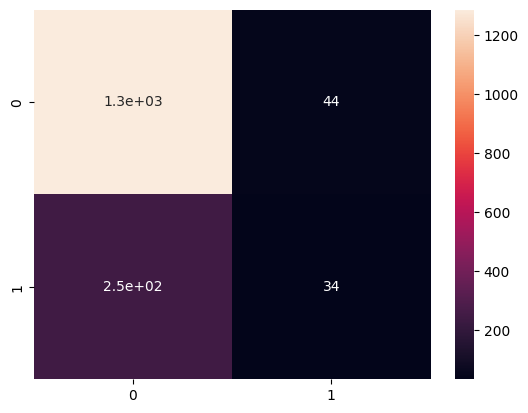

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1285,44
Churn Actual: 1,249,34


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


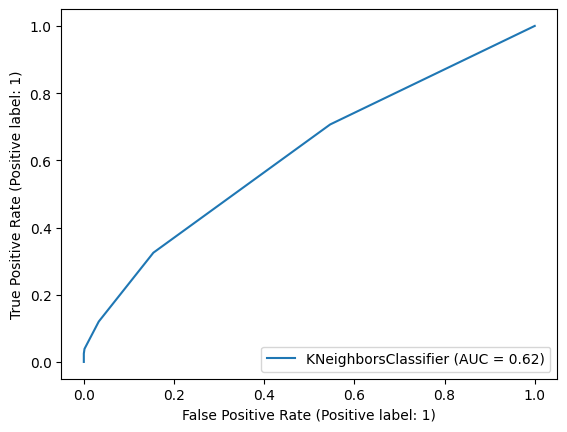

In [161]:
# Model Evaluation - evaluate the peadaormance of the model on the testing dataset
# Ada Boost
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model decision tree dari data train

# Make predictions on the testing dataset
y_pred = knn.predict(X_test)

# Check the accuracy of the model
print("Accuracy:", round(knn.score(X_test, y_test), 2))

# Check the classification report of the model
print(classification_report(y_test, y_pred))

# Check the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)
RocCurveDisplay.from_estimator(knn , X_test , y_test)

In [162]:
all_models = pd.DataFrame({'Test_Accuracy': test_acc_list, 'Test_Precision' : test_prec_list, 'Test_Recall' : test_rec_list}  , index = model_name_list)
all_models

,Test_Accuracy,Test_Precision,Test_Recall
Logistic Regression,0.850496,0.710000,0.250883
Support Vector Machine,0.824442,0.000000,0.000000
Decision Tree,0.934864,0.832090,0.787986
Random Forest,0.950372,0.967742,0.742049
AdaBoostClassifier,0.898883,0.780374,0.590106
k-Nearest Neighbor,0.818238,0.435897,0.120141


In [163]:
import plotly.express as px
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuracy'], y = all_models.index ,color=all_models['Test_Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='blues')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuracy',
yaxis_title='Models Names',
)
fig.show()

fig = px.bar(all_models, x=all_models['Test_Precision'], y = all_models.index ,color=all_models['Test_Precision'],title="<b>"+'Models Vs Test Precision',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Precision',
yaxis_title='Models Names',
)
fig.show()

# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Recall'], y = all_models.index ,color=all_models['Test_Recall'],title="<b>"+'Models Vs Test recall',text_auto= True , color_continuous_scale='greens')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test recall',
yaxis_title='Models Names',
)
fig.show()

Dari hasil evaluasi ini, dapat disimpulkan bahwa modeling Random Forest dan Decision Tree menunjukkan hasil terbaik. Selanjutnya, akan dilakukan cross-validation dan Hyperparameter tuning untuk meningkatkan performa modeling.

# D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation

- Dari hasil evaluasi diatas didapatkan dua modeling yang memiliki performance terbaik yaitu Random Forest dan Decision Tree. Selanjutnya dua modeling ini akan diuji cross-validation untuk mengetahui cross valitaion score nya. Nantinya, modeling yang memiliki score tertinggi yang akan digunakan dalam tahapan selanjutnya.

1. Random Forest


Skor Cross-Validation untuk setiap fold: [0.93178295 0.92868217 0.94883721 0.93643411 0.93944099]
Rata-rata Skor Cross-Validation: 0.9370354855794695
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1329
           1       0.94      0.73      0.82       283

    accuracy                           0.94      1612
   macro avg       0.94      0.86      0.89      1612
weighted avg       0.94      0.94      0.94      1612



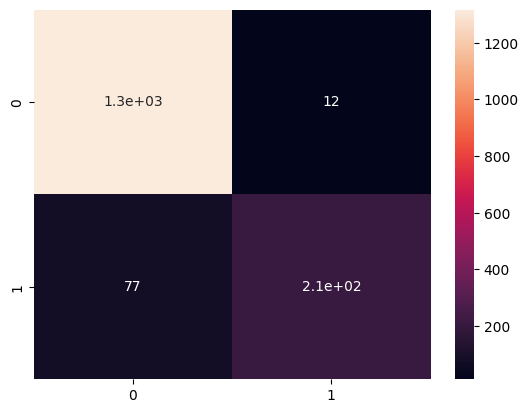

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1317,12
Churn Actual: 1,77,206


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


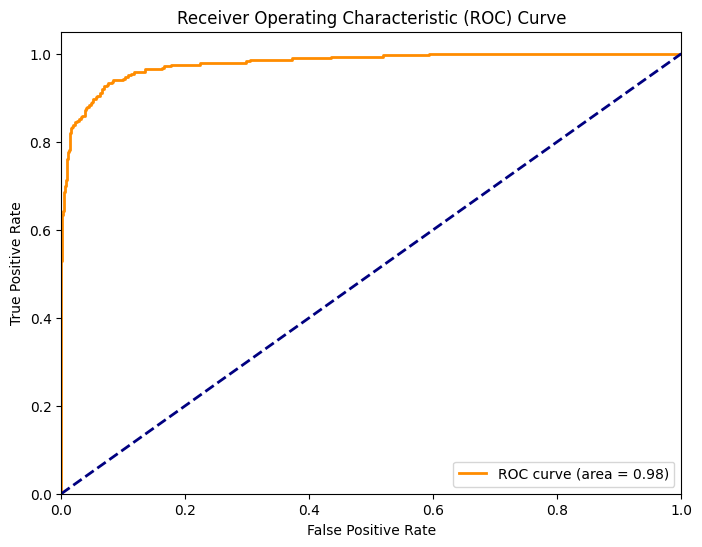

In [169]:
# Random Forest
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import pandas as pd

# Inisiasi object RandomForestClassifier dengan max_depth yang telah ditentukan
max_depth_value = 12
rf = RandomForestClassifier(max_depth=max_depth_value)

# Gunakan Stratified K-Fold cross-validation untuk menghindari bias
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dan mendapatkan skor untuk setiap fold
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')

# Melihat skor untuk setiap fold
print("Skor Cross-Validation untuk setiap fold:", cv_scores)

# Menampilkan rata-rata skor cross-validation
print("Rata-rata Skor Cross-Validation:", cv_scores.mean())

# Melakukan pelatihan model pada data train
rf.fit(X_train, y_train)

# Membuat prediksi pada dataset pengujian
y_pred = rf.predict(X_test)

# Menampilkan akurasi model pada data pengujian
print("Accuracy:", round(rf.score(X_test, y_test), 2))

# Menampilkan classification report dari model
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix dari model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Membuat DataFrame untuk menampilkan confusion matrix dengan label sumbu prediksi dan aktual
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)

# Menampilkan kurva ROC dan AUC
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


2. Decision Tree

Skor Cross-Validation untuk setiap fold: [0.90542636 0.91472868 0.91472868 0.90852713 0.90062112]
Rata-rata Skor Cross-Validation: 0.9088063941451201
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1329
           1       0.82      0.79      0.81       283

    accuracy                           0.93      1612
   macro avg       0.89      0.88      0.88      1612
weighted avg       0.93      0.93      0.93      1612



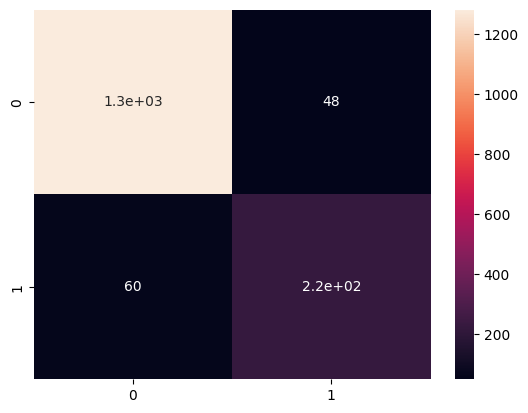

,Churn Predicted: 0,Churn Predicted: 1
Churn Actual: 0,1281,48
Churn Actual: 1,60,223


ΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘΘ


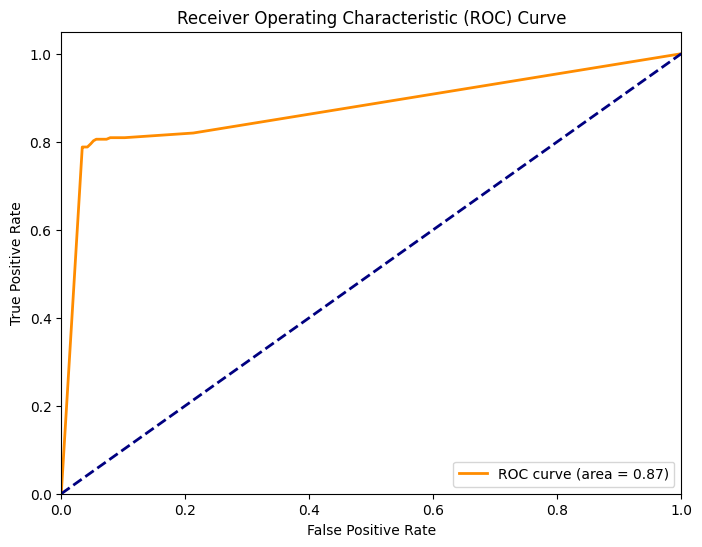

In [167]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import pandas as pd

# Inisiasi object DecisionTreeClassifier dengan max_depth yang telah ditentukan
max_depth_value = 12
dt = DecisionTreeClassifier(max_depth=max_depth_value)

# Gunakan Stratified K-Fold cross-validation untuk menghindari bias
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dan mendapatkan skor untuk setiap fold
cv_scores = cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy')

# Melihat skor untuk setiap fold
print("Skor Cross-Validation untuk setiap fold:", cv_scores)

# Menampilkan rata-rata skor cross-validation
print("Rata-rata Skor Cross-Validation:", cv_scores.mean())

# Melakukan pelatihan model pada data train
dt.fit(X_train, y_train)

# Membuat prediksi pada dataset pengujian
y_pred = dt.predict(X_test)

# Menampilkan akurasi model pada data pengujian
print("Accuracy:", round(dt.score(X_test, y_test), 2))

# Menampilkan classification report dari model
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix dari model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Membuat DataFrame untuk menampilkan confusion matrix dengan label sumbu prediksi dan aktual
cm_df = pd.DataFrame(cm, columns=['Churn Predicted: 0', 'Churn Predicted: 1'], index=['Churn Actual: 0', 'Churn Actual: 1'])
display(cm_df)
print('Θ' * 100)

# Menampilkan kurva ROC dan AUC
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Dari cross-validation diatas didapatkan bahwa modeling dengan rata- rata score tertinggi dicapai oleh modeling metode Random Forest sehingga untuk proses selanjutnya kita akan menggunakan modeling Random Forest

# E. Hyperparameter Tuning

Dari hasil Cross-validation ternyata rata-rata score tertinggi dicapai oleh modeling Random Forest. Oleh karena itu model Random Forest selanjutnya akan dilakukan Tuning untuk mencari kombinasi hyperparameter terbaik yang dapat meningkatkan performa model.

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 12, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Melatih model terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_rf_model = grid_search.best_estimator_
print("Model Random Forest terbaik:", best_rf_model)

# Menampilkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik untuk Random Forest:", best_params)

Model Random Forest terbaik: RandomForestClassifier(max_depth=20, random_state=42)
Hyperparameter terbaik untuk Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


###Nomor 2 Feature Importance
Setelah mendapatkan model yang paling baik, lakukan interpretasi pada model dengan
melihat feature importance-nya. Apa yang menyebabkan hasil prediksi model demikian.Feature importance
* Evaluasi feature yang paling penting,
* Tarik business insight-nya,
* Berikan action items berupa rekomendasi terhadap insight tersebut

A. Feature Importance

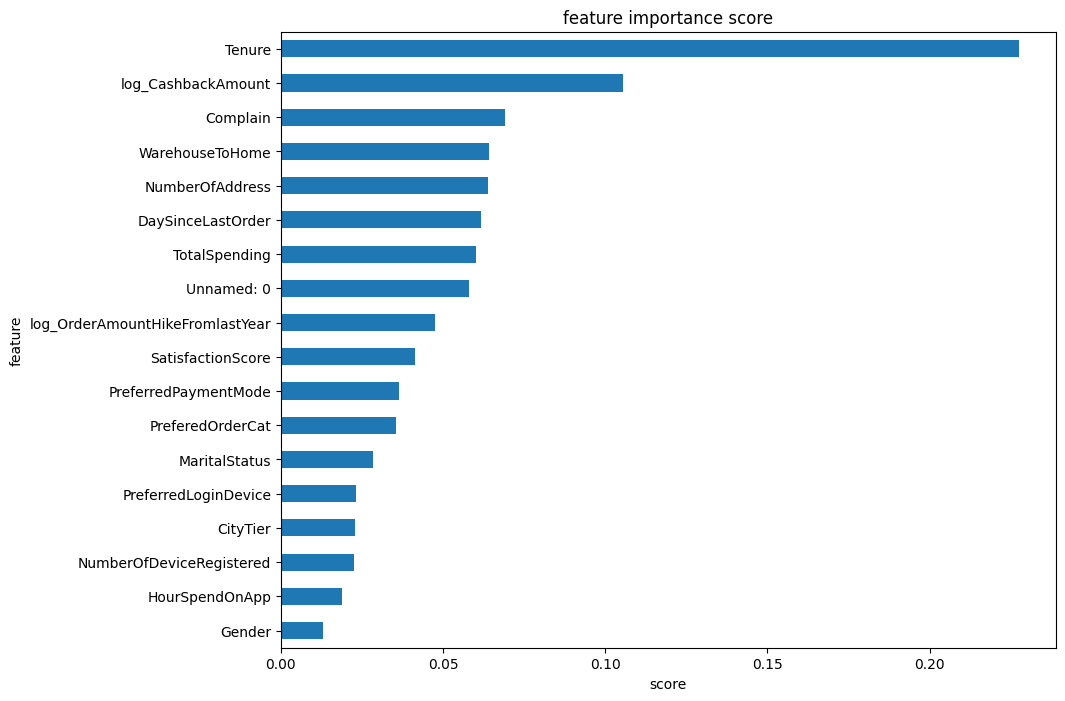

In [ ]:
show_feature_importance(rf)

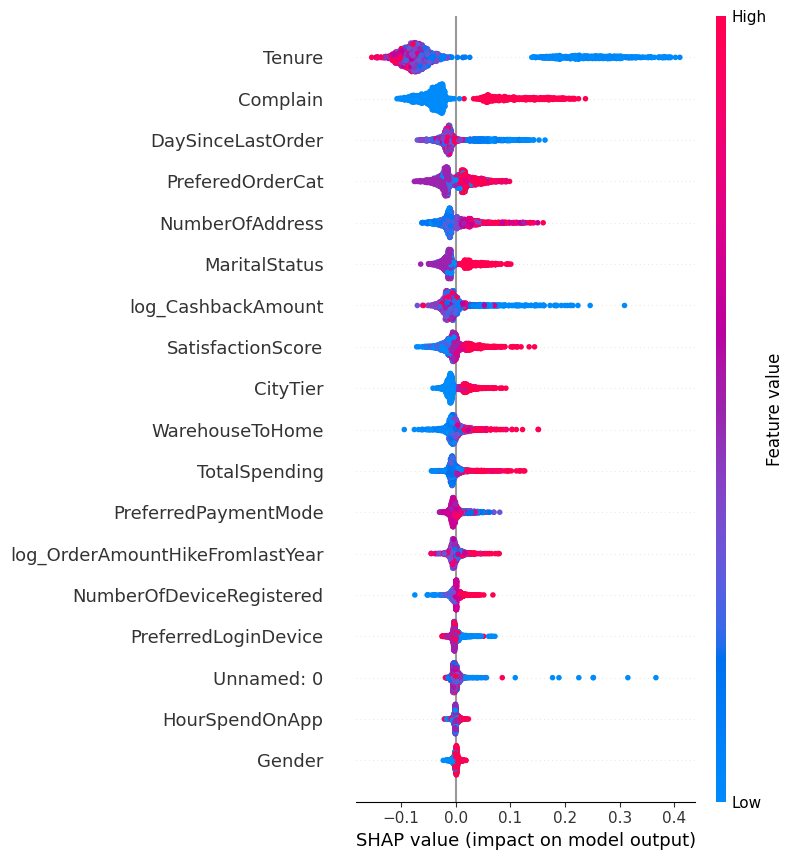

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

B. Business Insight
1. Churn pelanggan sangat dipengaruhi oleh Usia Tenure User
2. Dari hasil analisis juga diperoleh bahwa Gender merupakan salah satu feature yang kurang mempengaruhi angka Churn


C. Rekomendasi
* Usia Tenure atau lamanya pelanggan memakai aplikasi E-Commerce ini memiliki dampak yang signifikan terhadap tingkat churn . Oleh karena itu, sangat direkomendasikan untuk memahami dengan baik pada usia tenure berapa yang potensial menyebabkan pelanggan untuk churn? Dengan pemahaman ini, kita dapat merancang strategi pencegahan yang efektif untuk mengurangi tingkat Churn pelanggan pada usia tenure tersebut.